# 線形代数学

$$
% 太字のalias
\newcommand{\b}[1]{\boldsymbol{#1}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## ベクトル

$$
\boldsymbol{a} = (a_1, a_2, a_3)
$$

### ベクトル空間

実数倍と和が定義されており、任意の元の線形結合がふたたび元となる集合

:::{admonition} 定義（ベクトル空間）
任意の元$x, y \in L$と任意の実数$a, b$について実数倍$ax, by$とそれらの和$ax + by$が定義されており、
かならず$ax + by \in L$が成り立つような集合$L$を**ベクトル空間（vector space）**という。また$L$の元を**ベクトル（vector）**という
:::

イメージ的には原点と矢印と、矢印同士の演算（和や積など）だけが決まっている。座標は固定ではない

整数集合$\mathbb{Z}$は実数を掛けて線形結合した結果が整数になるとは限らないため、ベクトル空間ではない。
実数集合$\mathbb{R}$はベクトル空間である。


原点はあるらしい（原点がないのはアフィン空間らしい）

### 内積

$k$次元のベクトル$\boldsymbol{a} = (a_1, a_2, \dots, a_k)^T, \ \boldsymbol{b} = (b_1, b_2, \dots, b_k)^T$があるとき、

$$
\sum^k_{i=1} a_i b_i
$$

という演算を内積（inner product）といい、$\boldsymbol{a}^T \boldsymbol{b}$と表す


In [2]:
a = np.array([1, 1, 1])
b = np.array([2, 2, 2])
a.T @ b

6

#### 内積と類似度

:::{note} コサイン類似度
2つのベクトル$\boldsymbol{a} = (a_1, a_2, \dots, a_k)^T$と$\boldsymbol{b} = (b_1, b_2, \dots, b_k)^T$について、

$$
\cos(\b{a}, \b{b})
= \frac{ \b{a}^T \b{b} }{ ||\b{a}|| \ ||\b{b}|| }
= \frac{ \sum^k_{i=1} a_i b_i } { \sqrt{ \sum^k_{i=1} a_i^2 } \sqrt{ \sum^k_{i=1} b_i^2 } }
$$

をコサイン類似度という
:::

$$
\newcommand{\b}[1]{\boldsymbol{#1}}
\b{a}^T \b{b} = ||\b{a}|| \ ||\b{b}|| \cos(\b{a}, \b{b}) \\
\implies \cos(\b{a}, \b{b}) = \frac{ \b{a}^T \b{b} }{ ||\b{a}|| \ ||\b{b}|| }
$$


## 行列

$$
A =
\begin{pmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{pmatrix}
$$


### 行列積

$$
A =
\begin{pmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{pmatrix}, \
B =
\begin{pmatrix}
    b_{11} & b_{12}\\
    b_{21} & b_{22}
\end{pmatrix}
$$

とすると、行列積（matrix multiplication）は

$$
A B = 
\begin{pmatrix}
    a_{11} & a_{12}\\
    a_{21} & a_{22}
\end{pmatrix}
\begin{pmatrix}
    b_{11} & b_{12}\\
    b_{21} & b_{22}
\end{pmatrix}
=
\begin{pmatrix}
    a_{11} b_{11} + a_{12} b_{21} & a_{11} b_{12} + a_{12} b_{22} \\
    a_{21} b_{11} + a_{22} b_{21} & a_{21} b_{12} + a_{22} b_{22}
\end{pmatrix}
$$

### 直積

2つのベクトル$\boldsymbol{a}, \boldsymbol{b}$のテンソル積

$$
\boldsymbol{a} \circ \boldsymbol{b}
= \boldsymbol{a} \otimes \boldsymbol{b}
= \boldsymbol{a} \boldsymbol{b}^T
= \begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_n
\end{pmatrix}
\begin{pmatrix}
b_1 & b_2 & \cdots & b_n
\end{pmatrix}
= \begin{pmatrix}
    a_1 b_1 & a_1 b_2 & \cdots & a_1 b_n\\
    a_2 b_1 & a_2 b_2 & \cdots & a_2 b_n\\
    \vdots  & \vdots  & \ddots & \vdots \\
    a_n b_1 & a_n b_2 & \cdots & a_n b_n
\end{pmatrix}
$$

を**直積**（direct product）あるいは**外積**（outer product）という。

:::{card} 行列積と直積の関係

行列$A, B$の$i$番目の列ベクトルを$\boldsymbol{a}_i, \boldsymbol{b}_i$とし、行ベクトルを$\boldsymbol{a}_i^T, \boldsymbol{b}_i^T$とする。このとき、

$$
A^T B = \sum^n_{i=1} \boldsymbol{a}_i \boldsymbol{b}_i^T
$$

が成り立つ。この形式は計量経済学（回帰分析）の漸近正規性の証明などで多用される。
:::

（例）$A, B \in \mathbb{R}^{2\times 2}$のとき、

$$
\begin{align}
A^T B &= 
\begin{pmatrix}
    a_{11} & a_{21}\\
    a_{12} & a_{22}
\end{pmatrix}
\begin{pmatrix}
    b_{11} & b_{12}\\
    b_{21} & b_{22}
\end{pmatrix}
\\
&= 
\begin{pmatrix}
   a_{11} b_{11} + a_{21} b_{21} & a_{11} b_{12} + a_{21} b_{22}\\
   a_{12} b_{11} + a_{22} b_{21} & a_{12} b_{12} + a_{22} b_{22}\\
\end{pmatrix}
\end{align}
$$

であり、

$$
a_1
= \begin{pmatrix}
    a_{11} \\
    a_{12} 
\end{pmatrix}
, \hspace{1em}
b_1^T = 
\begin{pmatrix}
    b_{11} & b_{12}\\
\end{pmatrix}
$$

から

$$
\begin{align}
\sum^2_{i=1} \boldsymbol{a}_i \boldsymbol{b}_i^T
&= \begin{pmatrix}
    a_{11} \\
    a_{12}
\end{pmatrix}
\begin{pmatrix}
    b_{11} & b_{12}
\end{pmatrix}
+ \begin{pmatrix}
    a_{21} \\
    a_{22}
\end{pmatrix}
\begin{pmatrix}
    b_{21} & b_{22}
\end{pmatrix}
\\
&= \begin{pmatrix}
    a_{11} b_{11} & a_{11} b_{12}\\
    a_{12} b_{11} & a_{12} b_{12}
\end{pmatrix}
+ \begin{pmatrix}
    a_{21} b_{21} & a_{21} b_{22}\\
    a_{22} b_{21} & a_{22} b_{22}
\end{pmatrix}
\end{align}
$$

であるため。

:::{card} 行列積との関係

行列の一部をベクトルで表して（＝ブロック行列）、通常の行列積の定義をベクトルの積の形で表すこともできる

$n$次元正方行列$A, B$の$i$番目の列ベクトルを$\boldsymbol{a}_i, \boldsymbol{b}_i$とし、行ベクトルを$\boldsymbol{a}_i^T, \boldsymbol{b}_i^T$とする。このとき、

$$
\begin{align}
BA &= 
\begin{pmatrix}
    \boldsymbol{b}_{1}^T \\
    \boldsymbol{b}_{2}^T \\
    \vdots \\
    \boldsymbol{b}_{n}^T
\end{pmatrix}
\begin{pmatrix}
    \boldsymbol{a}_1, \boldsymbol{a}_2, \cdots, \boldsymbol{a}_n
\end{pmatrix}
=
\begin{pmatrix}
    \boldsymbol{b}_{1}^T \boldsymbol{a}_1 & \boldsymbol{b}_{1}^T \boldsymbol{a}_2 & \cdots & \boldsymbol{b}_{1}^T \boldsymbol{a}_n\\
    \boldsymbol{b}_{2}^T \boldsymbol{a}_1 & \boldsymbol{b}_{2}^T \boldsymbol{a}_2 & \cdots & \boldsymbol{b}_{2}^T \boldsymbol{a}_n\\
    \vdots & \vdots & & \vdots\\
    \boldsymbol{b}_{n}^T \boldsymbol{a}_1 & \boldsymbol{b}_{n}^T \boldsymbol{a}_2 & \cdots & \boldsymbol{b}_{n}^T \boldsymbol{a}_n\\
\end{pmatrix}
\end{align}
$$
:::

### クロス積

2つのベクトル$\boldsymbol{a}, \boldsymbol{b}$について

$$
\boldsymbol{a} \times \boldsymbol{b}
= \boldsymbol{a} \otimes \boldsymbol{b} - \boldsymbol{b} \otimes \boldsymbol{a}
$$

を**クロス積**（cross product）あるいは**ベクトル積**（vector product）あるいは**外積**という




### 行列と写像

> 行列は写像である
>
> （平岡和幸, & 堀玄. (2004). プログラミングのための線形代数. 株式会社 オーム社.）

例：ベクトル$x$に行列$A$を掛けて$y$とする

$$
y = A x
$$

$x$を$y$に写す写像（≒関数）が行列$A$



## 行列式

正方行列$A$に対して、その**行列式**（determinant）を$|A|$や$\det(A)$と表す。行列式はスカラーである。

2次の正方行列に対して、行列式は次のように求めることができる。

$$
A = 
\begin{pmatrix}
a & b\\
a' & b'
\end{pmatrix}
= (\b{a}, \b{b})
\\
\Rightarrow
|A|
= |\b{a}, \b{b}|
= ab' - a'b
$$


In [3]:
import numpy as np

A = np.array([
    [1, 2],
    [3, 4],
])

det = 1 * 4 - 2 * 3
det

-2

In [4]:
np.linalg.det(A)

-2.0000000000000004

きちんとした定義は次のようになる

:::{admonition} （定義）行列式

次の4つの条件を満たす$A$の列ベクトルの関数$\det(\b{a}_1, \b{a}_2, \cdots, \b{a}_d)$を$A$の行列式と呼ぶ。

(1) 各列ベクトルについて線形である

(2) 2つの列ベクトルが同じならゼロになる

(2') 2つの列ベクトルを入れ替えると符号が変わる

(3) $\det(I) = \det(\b{e}_1, \cdots, \b{e}_d) = 1$ （$\b{e}_1, \cdots, \b{e}_d$は基本ベクトル）


### 行列式の幾何的な解釈＝体積拡大率

2つのベクトルが四角形を表すとみなす。この四角形を変形させる行列$A$があったとき、変換後の四角形の面積はもとの面積の$\text{det}(A)$倍である、と解釈できる（行列式の値が正の値のとき。負の場合は軸が反転して裏返しになる。$\text{det}(A)=0$ならぺちゃんこに潰れている状態）

例えば$I \in \mathbb{R}^{2\times 2}$が構成する四角形に$A$を乗じて$AI=A$とするときの拡大率ともいえるし、$A$の面積とも言える

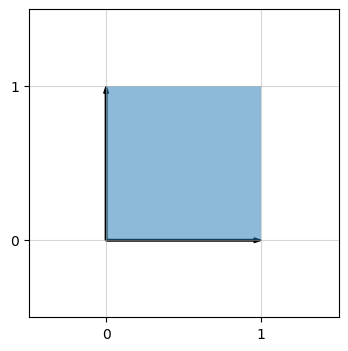

In [37]:
e0 = [1, 0]
e1 = [0, 1]

I = np.array([e0, e1])
O = np.array([0, 0])

fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(True, alpha=.5)
ax.arrow(*O, *e0, width=0.01, color="black", length_includes_head=True)
ax.arrow(*O, *e1, width=0.01, color="black", length_includes_head=True)
ax.fill_between(x=[0, 1], y1=0, y2=1, alpha=.5)

ax.set(xlim=[-0.5, 1.5], ylim=[-0.5, 1.5], xticks=[0, 1], yticks=[0, 1])
fig.show()

適当な行列$A$で変換するとこうなる

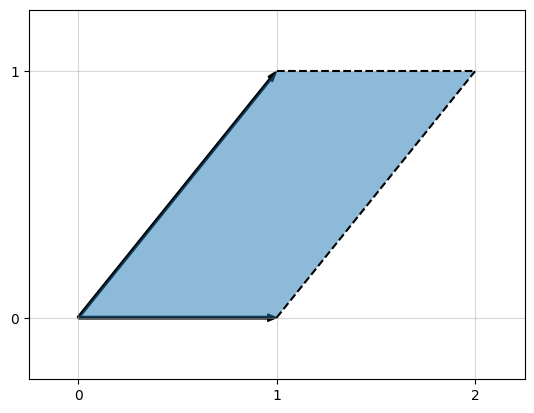

In [39]:
A = np.array([
    [1, 1],
    [0, 1]
])
e0_ = A @ e0
e1_ = A @ e1
y_ = e0_ + e1_

fig, ax = plt.subplots()
ax.grid(True, alpha=.5)
ax.arrow(0, 0, *e0_, width=0.01, color="black", length_includes_head=True)
ax.arrow(0, 0, *e1_, width=0.01, color="black", length_includes_head=True)

d = np.array([e0_, y_])
ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")
d = np.array([e1_, y_])
ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")

x = np.linspace(0, y_[0], 11)
ax.fill_between(x=x, y1=[max(e - 1, 0) for e in x], y2=[min(e, 1) for e in x], alpha=.5)
ax.set(xlim=[-0.25, 2.25], ylim=[-0.25, 1.25], xticks=[0, 1, 2], yticks=[0, 1])
fig.show()

平行四辺形の面積は底辺×高さ。今回は底辺も高さも1なので、面積は変わっていない。

この行列$A$の行列式は1になる

In [7]:
np.linalg.det(A)

1.0

参考：[Chapter 6 行列式 | 線形代数のエッセンス - YouTube](https://www.youtube.com/watch?v=K8axNorb1CU)

#### （例）次のような行列の場合は…？

$$
A = 
\begin{pmatrix}
1 & 2\\
1 & 3
\end{pmatrix}
, \hspace{2em}
B = 
\begin{pmatrix}
1 & 102\\
1 & 103
\end{pmatrix}
\\
\text{det}(A) = 3 - 2 = 1
, \hspace{2em}
\text{det}(B) = 103 - 102 = 1
$$


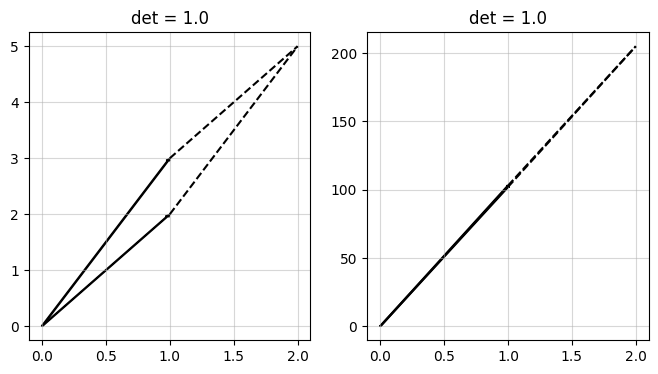

In [48]:
A = np.array([
    [1, 2],
    [1, 3]
])
B = np.array([
    [1, 102],
    [1, 103]
])
fig, axes = plt.subplots(ncols=2, figsize=[8, 4])

for X, ax in zip([A, B], axes):
    x0_ = X[0]
    x1_ = X[1]
    y_ = x0_ + x1_
    ax.grid(True, alpha=.5)
    ax.arrow(0, 0, *x0_, width=0.01, color="black", length_includes_head=True)
    ax.arrow(0, 0, *x1_, width=0.01, color="black", length_includes_head=True)

    d = np.array([x0_, y_])
    ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")
    d = np.array([x1_, y_])
    ax.plot(d[:, 0], d[:, 1], color="black", linestyle="--")

    x = np.linspace(0, y_[0], 11)
    ax.set(title=f"det = {np.linalg.det(X)}")
fig.show()

## 逆行列

正方行列$A$に対し、

$$
AA^{-1} = A^{-1} A = I
$$

が成立する正方行列$A^{-1}$が存在するとき、$A^{-1}$を$A$の**逆行列**という。（$I$は$A$と同じサイズの単位行列）

逆行列が存在する行列のことを**正則行列**や**可逆行列**という。

### 逆行列の効率的な計算

#### 行列分解で計算する方法

- https://speakerdeck.com/nagiss/hiyurisuteitukukontesutodeji-jie-xue-xi-siyou?slide=26

#### 共役勾配法

**共役勾配（conjugate gradient: CG）法**は逆行列の計算を二次最適化に落とし込む方法としても使われる


## 行列の計算規則

$$
A(B+C) = AB + AC
$$

In [6]:
import numpy as np
A = np.array([
    [1, 0],
    [0, 0]
])
B = np.array([
    [2, 0],
    [0, 3]
])
C = np.array([
    [0, -1],
    [-1, 0]
])

In [7]:
A @ (B + C)

array([[ 2, -1],
       [ 0,  0]])

In [8]:
A @ B + A @ C

array([[ 2, -1],
       [ 0,  0]])

### べき乗

$$
\begin{align}
AA &= A^2\\
AAA &= A^3
\end{align}
$$

$$
\begin{align}
A^{n+m} &= A^n + A^m\\
(A^n)^m &= A^{nm}
\end{align}
$$


:::{adomonition} 例

$$
A =
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
\hspace{1em}
A^2 = 
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
= 
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
$$


$$
B =
\begin{pmatrix}
2 & 0\\
0 & 3
\end{pmatrix}
\hspace{1em}
B^2 = 
\begin{pmatrix}
2 & 0\\
0 & 3
\end{pmatrix}
\begin{pmatrix}
2 & 0\\
0 & 3
\end{pmatrix}
= 
\begin{pmatrix}
4 & 0\\
0 & 9
\end{pmatrix}
$$
:::

#### 普通の数取は異なる計算規則

$$
\begin{align}
(A + B)^2 &= A^2 + AB + BA + B^2\\
(A + B) (A - B) &= A^2 - AB + BA - B^2\\
(AB)^2 &= ABAB
\end{align}
$$


:::{adomonition} 例

$$
A =
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
\hspace{1em}
B =
\begin{pmatrix}
2 & 0\\
0 & 3
\end{pmatrix}
$$

$$
\begin{align}
AB &=
\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}
\begin{pmatrix}
2 & 0\\
0 & 3
\end{pmatrix}
=
\begin{pmatrix}
2 & 0\\
0 & 0
\end{pmatrix}
\\
(AB)^2 &= 
\begin{pmatrix}
4 & 0\\
0 & 0
\end{pmatrix}
\end{align}
$$
:::

### 逆行列

$$
(A^{-1})^{-1} = A
$$


$$
(AB)^{-1} = B^{-1} A^{-1}
$$

$$
(A^k)^{-1} = (A^{-1})^k
$$

### 左右を入れ替えなければどこにカッコをつけてもおなじ

例えばベクトル$\boldsymbol{x} = (x_1, x_2, \dots, x_n)$について、$\boldsymbol{x} \boldsymbol{x}^T \boldsymbol{x}$は$(\boldsymbol{x} \boldsymbol{x}^T) \boldsymbol{x}$と捉えるより$\boldsymbol{x} (\boldsymbol{x}^T \boldsymbol{x})$としたほうが楽

$$
(\boldsymbol{x} \boldsymbol{x}^T) \boldsymbol{x}
= 
\begin{pmatrix}
x_1^2 & x_1 x_2 & \cdots & x_1 x_n\\
x_2 x_1 & x_2^2 & \cdots & x_2 x_n\\
\vdots & \vdots & & \vdots\\
x_n x_1 & x_n x_2 & \cdots & x_n^2
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}
= 
\begin{pmatrix}
x_1^2 \cdot x_1 + x_1 x_2 \cdot x_2 + \cdots + x_1 x_n \cdot x_n\\
x_2 x_1 \cdot x_1 + x_2^2 \cdot x_2 + \cdots + x_2 x_n \cdot x_n\\
\vdots\\
x_n x_1 \cdot x_1 + x_n x_2 \cdot x_2 + \cdots + x_n^2 \cdot x_n
\end{pmatrix}
=
\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}
\sum^n_{i=1} x_i^2
$$

$$
\boldsymbol{x} (\boldsymbol{x}^T \boldsymbol{x})
= 
\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix}
\sum^n_{i=1} x_i^2
$$

## 固有値と固有ベクトル

$d$次の正方行列$A$に対して

$$
A \b{x} = \lambda \b{x}
$$

が成り立つとき、スカラー$\lambda$を$A$の**固有値**（eigenvalue）、$d$次元ベクトル$\b{x} (\neq \b{0})$を$A$の$\lambda$に対応する**固有ベクトル**（eigenvector）と呼ぶ。

上の式は

$$
(A - \lambda I) \b{x} = \b{0}
$$

と表すことができる。これが$\b{x} \neq \b{0}$であるためには

$$
\det(A - \lambda I) = 0
$$

でなければならない。この式を**固有方程式**と呼び、固有値は固有方程式の解として求める。

:::{card} 例
$$
A = \begin{pmatrix}
-3 & -2\\
4 & 3
\end{pmatrix}
$$

の場合

$$
\begin{align}
|A - \lambda I|
&=
\begin{vmatrix}
-3 - \lambda & -2 \\
4 & 3 - \lambda \\
\end{vmatrix}
\\
&= (-3 \lambda)(3 - \lambda) + 4 \times 2\\
&= -9 + 3\lambda - 3\lambda + \lambda^2 + 8\\
&= \lambda^2 - 1\\
&= (\lambda - 1)(\lambda + 1)\\
&= 0
\end{align}
$$

より、$\lambda = 1, -1$が求まる。（それぞれ$\lambda_1, \lambda_2$とおくことにする）

$\lambda_1 = 1$に対応する固有ベクトルを$\b{x}=(x_1,x_2)^\top$とおいて次のように求める

$$
A \b{x} = \lambda_1 \b{x}
\iff
\begin{align}
-3 x_1 - 2 x_2 &= x_1\\
4 x_1 + 3 x_2 &= x_2\\
\end{align}
$$

より$-2 x_1 = x_2$という関係性になるので、変数$s$を使って次のように表す。

$$
\b{x} = \begin{pmatrix}
s \\ -2 s
\end{pmatrix}
$$


同様に、$\lambda_2 = -1$に対応する固有ベクトルを$\b{y}=(y_1, y_2)^\top$とおいて次のように求める

$$
A \b{x} = \lambda_2 \b{y}
\iff
\begin{align}
-3 y_1 - 2 y_2 &= -y_1\\
4 y_1 + 3 y_2 &= -y_2\\
\end{align}
$$

より$y_1 = -y_2$という関係性なので、変数$t$を使って

$$
\b{y} = \begin{pmatrix}
t \\ -t
\end{pmatrix}
$$

となる。

$s$や$t$は任意の値でよいので、固有ベクトルの長さが1になるように定めると、固有ベクトルは

$$
\b{x} = \begin{pmatrix} 1/\sqrt{5} \\ -2/\sqrt{5} \end{pmatrix}
  \simeq \begin{pmatrix} 0.447 \\ -0.894 \end{pmatrix}
, \hspace{2em}
\b{y} = \begin{pmatrix} 1/\sqrt{2} \\ -1/\sqrt{2} \end{pmatrix}
  \simeq \begin{pmatrix} 0.707 \\ -0.707 \end{pmatrix}
$$

となる。
:::

In [9]:
import numpy as np

A = np.array([
    [-3, -2],
    [4, 3],
])

lambdas, vectors = np.linalg.eig(A)
print(f"""
λ={lambdas}
x={vectors[:, 1].round(3)}
y={vectors[:, 0].round(3)}
""")


λ=[-1.  1.]
x=[ 0.447 -0.894]
y=[-0.707  0.707]



## 連立方程式

未知のベクトル$x$を推定する場合

$$
Ax = b
$$

$$
x = A^{-1} b
$$


[線形代数Ｉ/連立一次方程式 - 武内＠筑波大](https://dora.bk.tsukuba.ac.jp/~takeuchi/?%E7%B7%9A%E5%BD%A2%E4%BB%A3%E6%95%B0%EF%BC%A9%2F%E9%80%A3%E7%AB%8B%E4%B8%80%E6%AC%A1%E6%96%B9%E7%A8%8B%E5%BC%8F)

## 参考

- [線形代数基礎](http://www.phys.shimane-u.ac.jp/tanaka_lab/lecture/linear_algebra/linear_algebra.pdf)